# Data Analysis Mathematics, Algorithms and Modeling

## Team Information - **Group Presentation 2**

**Team Members**

Name: Ayush Patel  
Student Number: 9033358

Name: Nikhil Shankar  
Student Number: 9026254

Name: Sreehari Prathap  
Student Number: 8903199


## Step 1: Install and Configure the IDE (e.g., Jupyter Notebook and VS Code)
- Install Anaconda (for Jupyter Notebook) and Visual Studio Code (VS Code).
  - Anaconda: Visit [anaconda.com](https://www.anaconda.com/products/individual) and download the appropriate installer for your operating system.
  - VS Code: Download and install from [Visual Studio Code](https://code.visualstudio.com/).
- Install Pandas Library
  - Open the terminal and run the following command: `pip install pandas`

## Dataset 1 : Salary Data
We are using the Salary_Data dataset from [Kaggle], which can be downloaded directly via the link:
- URL: [https://www.kaggle.com/datasets/mohithsairamreddy/salary-data]

### Data Cleansing Process for User Data (Salaries) from a CSV File

In [18]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

file = "./Salary_Data.csv"
df_unfiltered = pd.read_csv(file)
row_count = len(df_unfiltered)

print("Total number of datapoints(rows)", row_count)

Total number of datapoints(rows) 6704


##### Removing empty valued rows from the dataset
By giving axis as 0 we filter rows with any empty values. 

In [19]:
# Drop rows with any missing values
df = df_unfiltered.dropna(axis=0, how='any')
print(df.info())
print(df.describe())

# Replace similar education levels to have uniformity using .loc
df.loc[:, 'Education Level'] = df['Education Level'].replace({
    "Bachelor's Degree": "Bachelor's",
    "Master's Degree": "Master's",
    "PhD": "phD"
})

print(df['Education Level'].unique())

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.3+ KB
None
               Age  Years of Experience         Salary
count  6698.000000          6698.000000    6698.000000
mean     33.623022             8.095178  115329.253061
std       7.615784             6.060291   52789.792507
min      21.000000             0.000000     350.000000
25%      28.000000             3.000000   70000.000000
50%      32.000000             7.000000  115000.000000
75%      38.000000            12.000000  160000.000000


We understand that there are no rows with empty values. The dataset is now filtered for analysis so we can proceed to the next step. 

#### **Checking for normality in distribution of salary**

In [20]:
from scipy.stats import anderson

def check_shapiro_wilk_normality(data, title):
    statistic, p_value = stats.shapiro(data)
    # Output the results
    print('Shapiro-Wilk Test Statistic:', statistic)    
    print('p-value:', p_value)
    # Interpretation
    alpha = 0.05
    print(title)
    if p_value < alpha:
        print("Reject the null hypothesis: the data does not follow a normal distribution.\n\n")
    else:
        print("Fail to reject the null hypothesis: the data follows a normal distribution.\n\n")

check_shapiro_wilk_normality(df['Salary'], "Check if distribution of age is normal")


Shapiro-Wilk Test Statistic: 0.9587577491585018
p-value: 6.541777182145654e-40
Check if distribution of age is normal
Reject the null hypothesis: the data does not follow a normal distribution.




> We find that the salary distribution is not Normal

### Statistical test - Which one to select ?

These were the peculiarities of our dataset and the hypothesis.

1. **Multiple Groups**: The dataset has more than two independent groups based on education level (Bachelor's, Master's, PhD). ANOVA is ideal when comparing means across three or more groups.
  
2. **Testing for Differences**: The goal of this analysis is to find the impact of Degree in drawing Salary. 
   
3. **Assumption of Normality**: From the Shapiro-Wilks normality test we found that the distribution for salary is not normal.

- Since we had more than 2 groups to compare our first choice was One way ANOVA test. 
- After Shapiro Wilks test we found that the distribution of salary ie the independent variable is not normal.
- This means we cant use ANOVA, F-Test or T-test.
- Chi-Squared test was out of scope since the parameter is not categorical.
- We couldn't choose Wilcoxon Signed rank test since we had more than 2 groups.

Since the data is not normally distributed the best option for us was to go with a non-parametric test. And since we had more than 2 groups we chose **Kruskal Wallis H Test** to test our hypothesis.

These are the 4 main characteristics required for a dataset in order for **Kruskals Wallis** test to perform well.

- Continuos data ( ordinal ratio etc also works )
- Independent Groups ( in our case education groups are mutually exclusive )
- Three or more groups : In our case we had 4
- Non-Normal Distribution : Using shapiro wilks test we found our data is not normally distributed.



#### **Kruskal Wallis H Test**

### Null Hypothesis (H0)
Null Hypothesis (H0): The medians of all groups are equal. 


### Alternative Hypothesis (H1)
Alternative Hypothesis (H1): At least one group median is different from the others.

H-statistic: 2822.5383556755637, P-value: 0.0


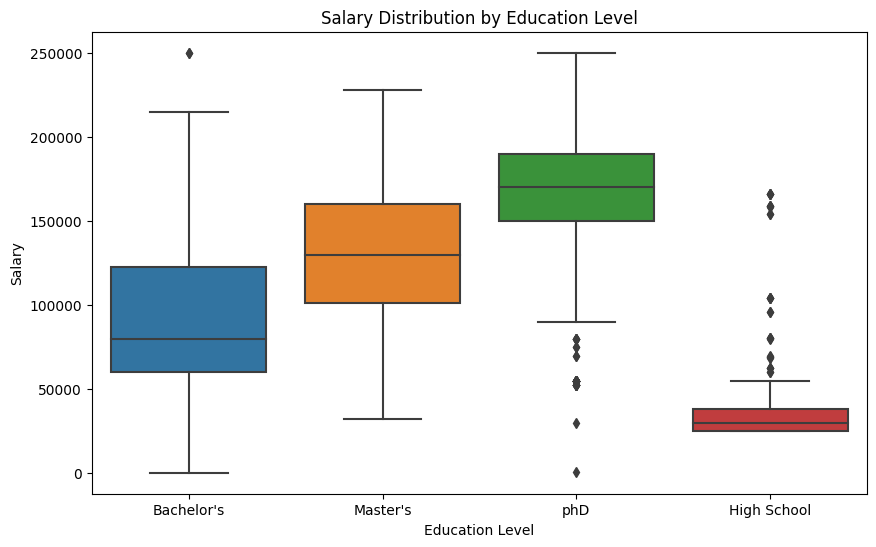

In [21]:
from scipy.stats import kruskal


class SalaryAnalysis:
    def __init__(self, data):
        self.df = data

    def split_data_by_education(self):
        self.bachelors = self.df[self.df['Education Level'] == 'Bachelor\'s']['Salary']
        self.masters = self.df[self.df['Education Level'] == 'Master\'s']['Salary']
        self.phd = self.df[self.df['Education Level'] == 'phD']['Salary']
        self.high_school = self.df[self.df['Education Level'] == 'High School']['Salary']

    def perform_kruskals(self):
        self.split_data_by_education()
        h_stat, p_value = kruskal(self.bachelors, self.masters, self.phd, self.high_school)
        return h_stat, p_value

    def visualize_data(self):
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Education Level', y='Salary', data=self.df)
        plt.title('Salary Distribution by Education Level')
        plt.show()

# Instantiate the class
analysis = SalaryAnalysis(df)

# Perform Kruskal
h_stat, p_value = analysis.perform_kruskals()

print(f'H-statistic: {h_stat}, P-value: {p_value}')

# Visualize the data
analysis.visualize_data()


### Summary
We conducted a Kruskals Wallis H-Test to test whether there is a significant difference in salaries across different education levels (Bachelor's, Master's, PhD). The null hypothesis stated that there is no significant difference in salaries based on education, while the alternative hypothesis suggested that salaries do differ significantly. The analysis resulted in an H-statistic of 2822.53 and a p-value of 0.0. Since the p-value is less than the significance level of 0.05, we reject the null hypothesis, indicating that there is a significant difference in salaries based on education level atleast in one of the groups. 

Kruskal Wallis H Test confirms the hypothesis that the median salary for atleast one group is significantly differing from others.